# NUCLEAR ENERGY DATA SET: EDA ANALYSIS

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import HTML

In [2]:
df1 = pd.read_csv("power_plant_database_global.csv",sep = ';', low_memory=False)

In [3]:
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34929,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34930,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34931,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34932,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [4]:

print("\nData shape:")
print(df1.shape)
print("\nFirst few rows:")
df1.head()
print("\nColumn information:")
df1.info()


Data shape:
(34934, 36)

First few rows:

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34934 entries, 0 to 34933
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34934 non-null  object 
 1   country_long                    34934 non-null  object 
 2   name                            34934 non-null  object 
 3   gppd_idnr                       34934 non-null  object 
 4   capacity_mw                     34934 non-null  float64
 5   latitude                        34934 non-null  float64
 6   longitude                       34934 non-null  float64
 7   primary_fuel                    34934 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year            

In [5]:
print("\nMissing values per column:")
print(df1.isnull().sum())


Missing values per column:
country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32990
other_fuel2                       34658
other_fuel3                       34842
commissioning_year                17488
owner                             14067
source                               20
url                                  29
geolocation_source                  430
wepp_id                           18710
year_of_capacity_data             20047
generation_gwh_2013               28517
generation_gwh_2014               27708
generation_gwh_2015               26731
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25297
generation_g

In [6]:
def fuel_analysis(df):
    fuel_stats = df.groupby('primary_fuel').agg(
        num_plants=('capacity_mw', 'count'),
        total_capacity=('capacity_mw', 'sum'),
        avg_capacity=('capacity_mw', 'mean')
    ).sort_values('total_capacity', ascending=False)
    return fuel_stats
fuel_stats = display(fuel_analysis(df1))

,num_plants,total_capacity,avg_capacity
primary_fuel,,,
Coal,2329,1.964341e+06,843.426792
Gas,3998,1.493051e+06,373.449375
Hydro,7156,1.053160e+06,147.171551
Nuclear,195,4.079118e+05,2091.855179
Wind,5344,2.630537e+05,49.224126
Oil,2320,2.618787e+05,112.878754
Solar,10664,1.882923e+05,17.656820
Biomass,1430,3.428130e+04,23.972938
Waste,1068,1.474871e+04,13.809657


In [7]:
if 'primary_fuel' in df1.columns:
    nuclear = df1[df1['primary_fuel'] == 'Nuclear']
    
    print(f"nuclear plants: {len(nuclear)}")
    print(f"nuclear capacity: {nuclear['capacity_mw'].sum():,.0f} MW")
    print(f"average capacity: {nuclear['capacity_mw'].mean():.1f} MW")
    
    print("\nTop 10 impianti nucleari per capacità:")
    display(nuclear.nlargest(10, 'capacity_mw')[['name', 'country_long', 'capacity_mw']])

nuclear plants: 195
nuclear capacity: 407,912 MW
average capacity: 2091.9 MW

Top 10 impianti nucleari per capacità:


,name,country_long,capacity_mw
16623,Kashiwazaki Kariwa,Japan,8212.0
21924,Zaporozhye,Ukraine,6000.0
20049,Hanbit,South Korea,5900.0
20051,Hanul,South Korea,5900.0
10973,GRAVELINES,France,5460.0
11674,PALUEL,France,5320.0
10589,CATTENOM,France,5200.0
16767,Ohi,Japan,4710.0
16510,Fukushima Daina,Japan,4400.0
31206,Palo Verde,United States of America,4209.6


## Global Power Plant Analysis

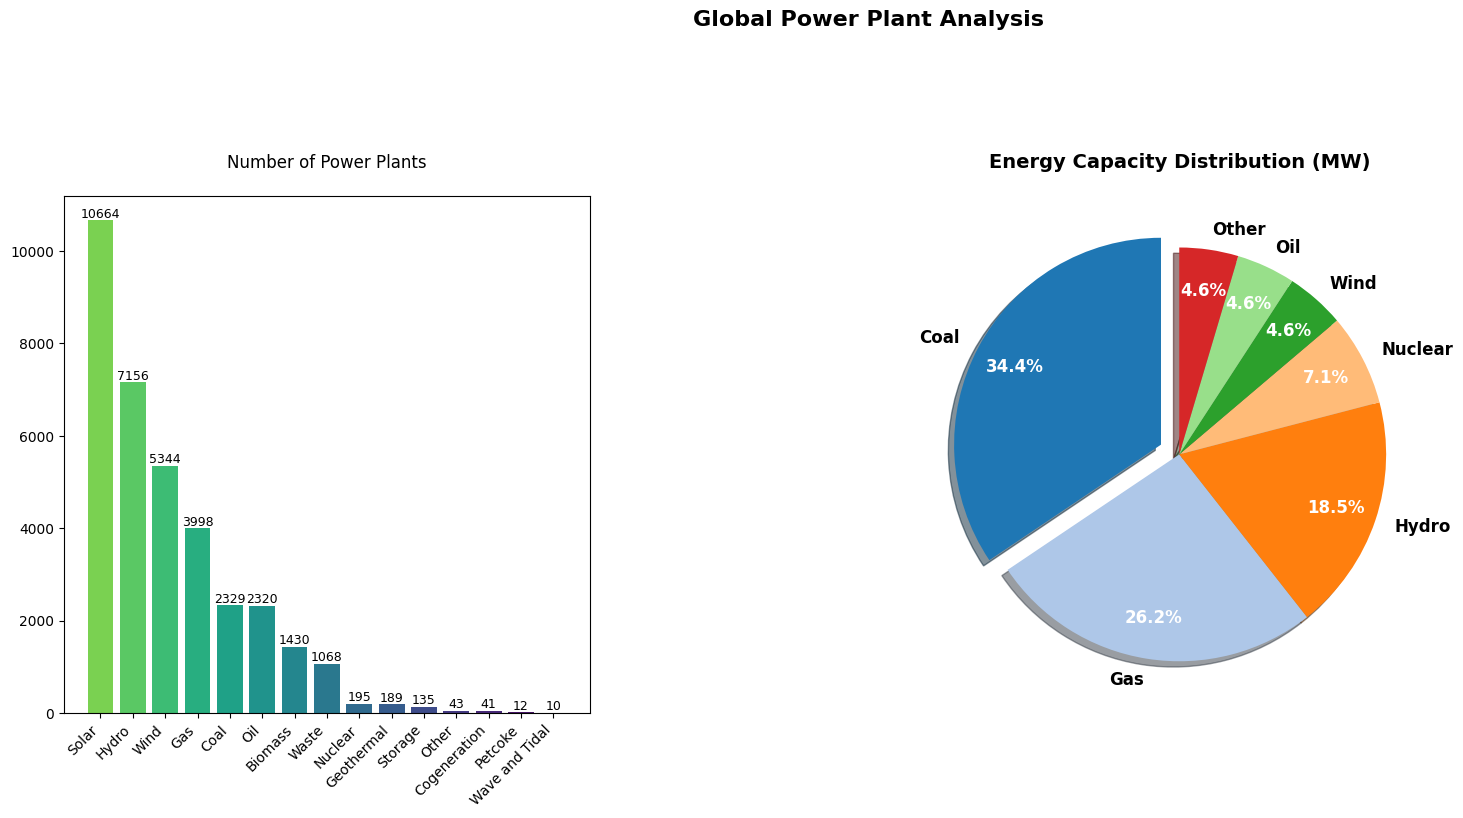

In [9]:

plt.figure(figsize=(18, 8))

# --- FIRST SUBPLOT ---
plt.subplot(1, 3, 1) 
fuel_counts = df1['primary_fuel'].value_counts()
colors = plt.cm.viridis_r(np.linspace(0.2, 1, len(fuel_counts)))

bars = plt.bar(fuel_counts.index, fuel_counts.values, color=colors)
plt.title('Number of Power Plants', fontsize=12, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, 
             f'{int(height)}', 
             ha='center', va='bottom', fontsize=9)

# --- SECOND SUBPLOT ---
plt.subplot(1, 3, (2, 3)) 

fuel_capacity = df1.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False)
threshold = 0.043 * fuel_capacity.sum()  
small_categories = fuel_capacity[fuel_capacity < threshold]
other_capacity = small_categories.sum()

main_categories = fuel_capacity[fuel_capacity >= threshold]
if other_capacity > 0:
    fuel_capacity_clean = pd.concat([main_categories, pd.Series({'Other': other_capacity})])
else:
    fuel_capacity_clean = main_categories

explode = [0.1 if i == fuel_capacity_clean.idxmax() else 0 for i in fuel_capacity_clean.index]
wedges, texts, autotexts = plt.pie(fuel_capacity_clean, 
                                  labels=fuel_capacity_clean.index, 
                                  autopct='%1.1f%%',
                                  startangle=90, 
                                  explode=explode, 
                                  shadow=True,
                                  colors=plt.cm.tab20.colors,
                                  textprops={'fontsize': 12},
                                  pctdistance=0.8)

plt.setp(texts, fontsize=12, weight='bold')
plt.setp(autotexts, fontsize=12, color='white', weight='bold')
plt.title('Energy Capacity Distribution (MW)', fontsize=14, pad=20, weight='bold')

plt.suptitle('Global Power Plant Analysis', fontsize=16, y=1.05, weight='bold')
plt.tight_layout(pad=3.0)
plt.show()

## Nuclear Plants Geographic Distribution

In [10]:

nuclear_plants = df1[df1['primary_fuel'] == 'Nuclear'].copy()

fig = px.scatter_geo(nuclear_plants,
                    lat='latitude',
                    lon='longitude',
                    size='capacity_mw',
                    color='capacity_mw',
                    hover_name='name',
                    title='Global Distribution',
                    projection='natural earth')

fig.update_geos(
    visible=True,  
    showcountries=True,  
    countrycolor="Black", 
    showland=True,  
    landcolor="lightgray",  
    showocean=True,  
    oceancolor="lightblue",  
    showcoastlines=True,  
    coastlinecolor="blue")

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Capacità (MW)"))


HTML(fig.to_html(include_plotlyjs='cdn'))

In [ ]:
# 1. US Nuclear Generating Statistics 
us_nuclear = pd.read_csv("us_nuclear_generating_statistics_1971_2021.csv")
# 2. US Uranium Production Summary
uranium_prod = pd.read_csv("uranium_production_summary_us.csv")
# 3. World Electricity Generation (Nuclear) 
world_gen = pd.read_csv("world_electricity_generation.csv")
# 4. Death Rates from Energy Production 
death_rates = pd.read_csv("rates_death_from_energy_production_per_twh.csv")
# 5. Nuclear Energy Overview 
nuclear_overview = pd.read_csv("nuclear_energy_overview_eia.csv")
# 6. Reactors by Parent Company
reactors_companies = pd.read_csv("reactors_parent_companies.csv")
# 7. Uranium Plants in US
uranium_plants = pd.read_csv("number_of_plants_producing_uranium_in_us.csv")
# 8. World Nuclear Energy Generation
world_nuclear_gen = pd.read_csv("world_nuclear_energy_generation.csv")
# 9. Uranium Purchase Prices
uranium_prices = pd.read_csv("uranium_purchase_price_us.csv")

## World Electricity Generation (Nuclear) 

In [12]:

world_gen

,Year,Month,nuclear_generation_twh,share_of_generation_pct
0,2019,1,242.40,11.10
1,2019,2,219.65,10.96
2,2019,3,232.28,11.04
3,2019,4,215.00,10.87
4,2019,5,218.44,10.46
...,...,...,...,...
58,2023,11,217.07,9.40
59,2023,12,236.49,9.51
60,2024,1,236.02,9.48
61,2024,2,218.63,9.40


In [ ]:
print("\nMissing values per column:")
print(world_gen.isnull().sum())


Missing values per column:
Year                       0
Month                      0
nuclear_generation_twh     0
share_of_generation_pct    0
date                       0
month                      0
dtype: int64


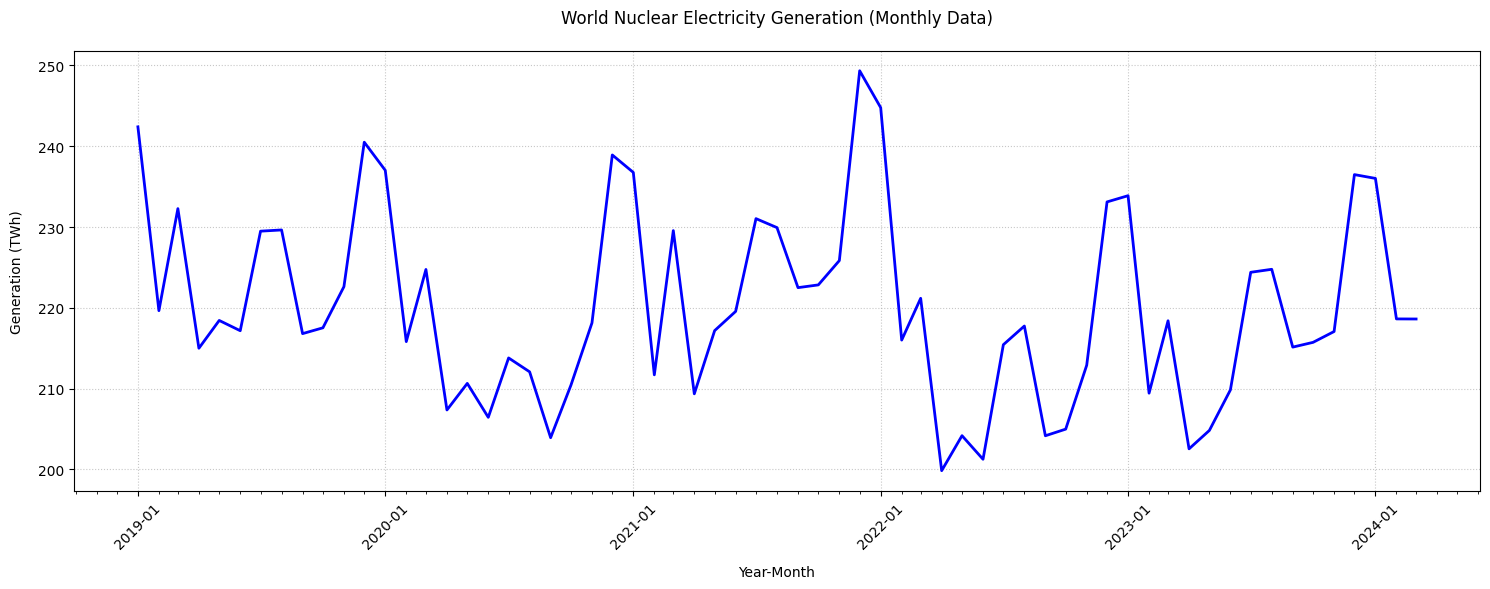

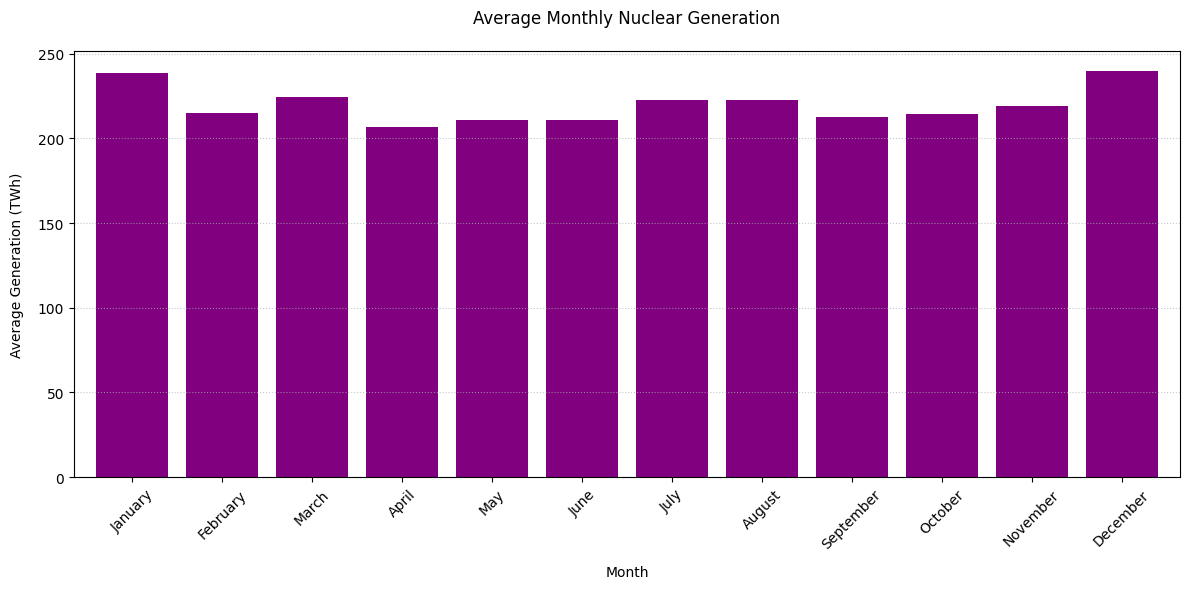

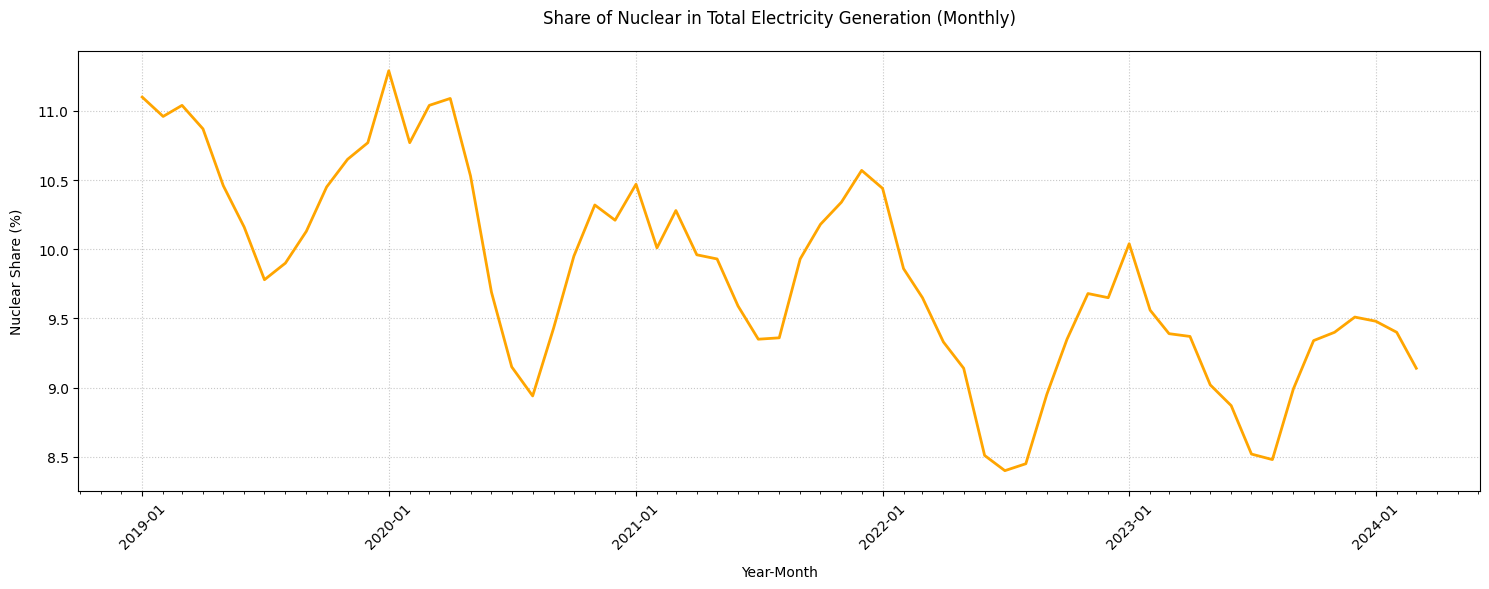

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter


world_gen['date'] = pd.to_datetime(
    world_gen['Year'].astype(str) + '-' + 
    world_gen['Month'].astype(str) + '-01',  
    format='%Y-%m-%d')

plt.figure(figsize=(15,6))
plt.plot(world_gen['date'], world_gen['nuclear_generation_twh'], 
         color='blue', linewidth=2)

ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())    
ax.xaxis.set_minor_locator(MonthLocator())    
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m')) 

plt.title('World Nuclear Electricity Generation (Monthly Data)', pad=20)
plt.xlabel('Year-Month', labelpad=10)
plt.ylabel('Generation (TWh)', labelpad=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
world_gen['month'] = world_gen['date'].dt.month_name()
monthly_avg = world_gen.groupby('month')['nuclear_generation_twh'].mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='purple', width=0.8)
plt.title('Average Monthly Nuclear Generation', pad=20)
plt.xlabel('Month', labelpad=10)
plt.ylabel('Average Generation (TWh)', labelpad=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,6))
plt.plot(world_gen['date'], world_gen['share_of_generation_pct'], 
         color='orange', linewidth=2)

ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Share of Nuclear in Total Electricity Generation (Monthly)', pad=20)
plt.xlabel('Year-Month', labelpad=10)
plt.ylabel('Nuclear Share (%)', labelpad=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## USA Nuclear Generating Statistics

In [ ]:
us_nuclear.head(5)

,YEAR,TOTAL ELECTRICITY GENERATION,NUCLEAR GENERATION,NUCLEAR FUEL SHARE,CAPACITY FACTOR,SUMMER CAPACITY
0,1971,1615853616,38104545,2.4,48.2,9033
1,1972,1752978413,54091135,3.1,42.5,14481
2,1973,1864056631,83479463,4.5,53.5,22683
3,1974,1870319405,113975740,6.1,47.8,31867
4,1975,1920754569,172505075,9.0,55.9,37267


In [ ]:
print("\nMissing values per column:")
print(us_nuclear.isnull().sum())


Missing values per column:
YEAR                            0
TOTAL ELECTRICITY GENERATION    0
NUCLEAR GENERATION              0
NUCLEAR FUEL SHARE              0
CAPACITY FACTOR                 0
SUMMER CAPACITY                 0
dtype: int64


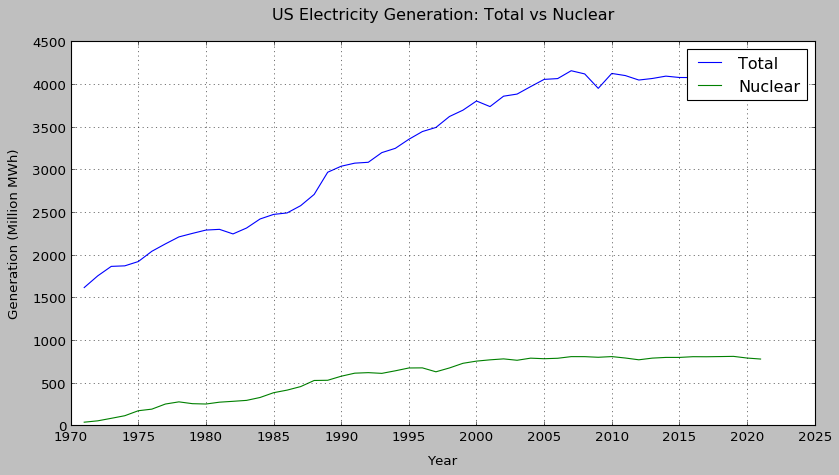

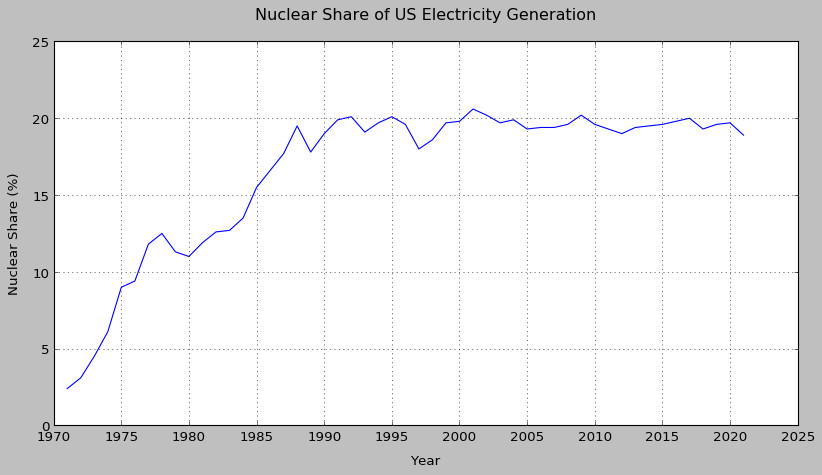

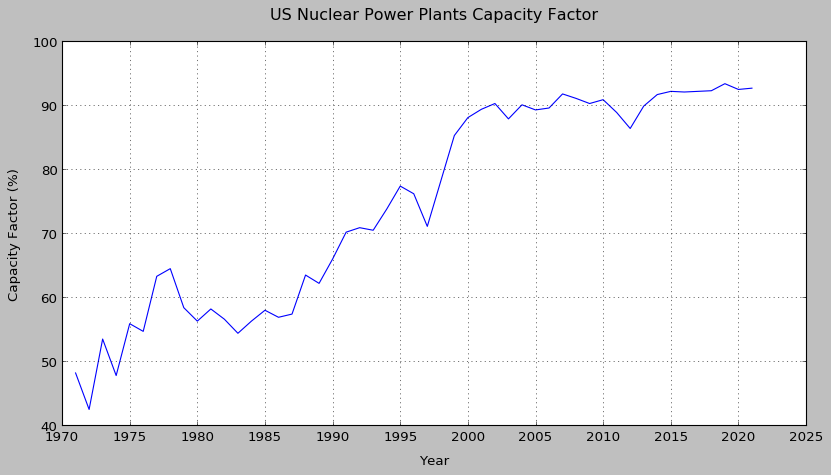

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. Electricity Generation Comparison
plt.figure(figsize=(12,6))
plt.plot(us_nuclear['YEAR'], us_nuclear['TOTAL ELECTRICITY GENERATION']/1e6, label='Total')
plt.plot(us_nuclear['YEAR'], us_nuclear['NUCLEAR GENERATION']/1e6, label='Nuclear')
plt.title('US Electricity Generation: Total vs Nuclear')
plt.xlabel('Year')
plt.ylabel('Generation (Million MWh)')
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

# 2. Nuclear Share Percentage
plt.figure(figsize=(12,6))
plt.plot(us_nuclear['YEAR'], us_nuclear['NUCLEAR FUEL SHARE'])
plt.title('Nuclear Share of US Electricity Generation')
plt.xlabel('Year')
plt.ylabel('Nuclear Share (%)')
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

# 3. Capacity Factor Trend
plt.figure(figsize=(12,6))
plt.plot(us_nuclear['YEAR'], us_nuclear['CAPACITY FACTOR'])
plt.title('US Nuclear Power Plants Capacity Factor')
plt.xlabel('Year')
plt.ylabel('Capacity Factor (%)')
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

## USA Uranium Production 

In [ ]:
uranium_prod.head(5)

,Year,Exploration and development surface drililng,Exploration and development drilling expenditures,Mine production of uranium,Uranium concentrate production,Uranium concentrate shipments,Employment
0,2009,3.7,35.4,4.1,3.7,3.6,"1,096"
1,2010,4.9,44.6,4.2,4.2,5.1,"1,073"
2,2011,6.3,53.6,4.1,4.0,4.0,"1,191"
3,2012,7.2,66.6,4.3,4.1,3.9,"1,196"
4,2013,3.8,49.9,4.6,4.7,4.7,"1,156"


In [ ]:
print("\nMissing values per column:")
print(uranium_prod.isnull().sum())


Missing values per column:
Year                                                  0
Exploration and development surface drililng          0
Exploration and development drilling  expenditures    0
Mine production of uranium                            0
Uranium concentrate production                        0
Uranium concentrate shipments                         0
Employment                                            0
dtype: int64


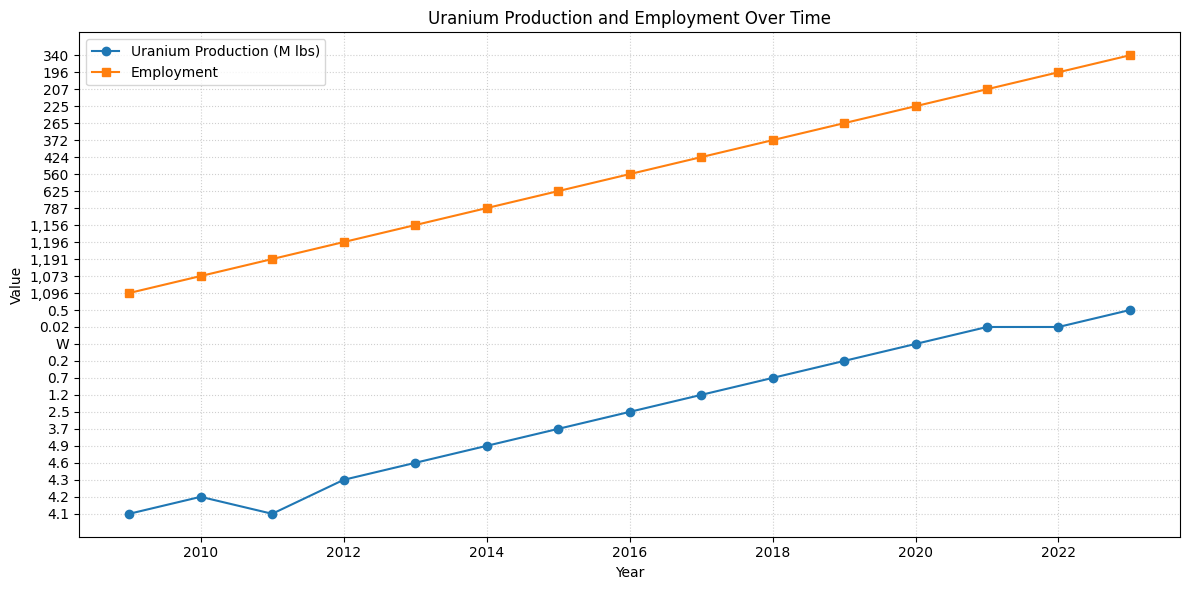

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot uranium production and employment
plt.plot(uranium_prod['Year'], uranium_prod['Mine production of uranium'], label='Uranium Production (M lbs)', marker='o')
plt.plot(uranium_prod['Year'], uranium_prod['Employment'], label='Employment', marker='s')

plt.title('Uranium Production and Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

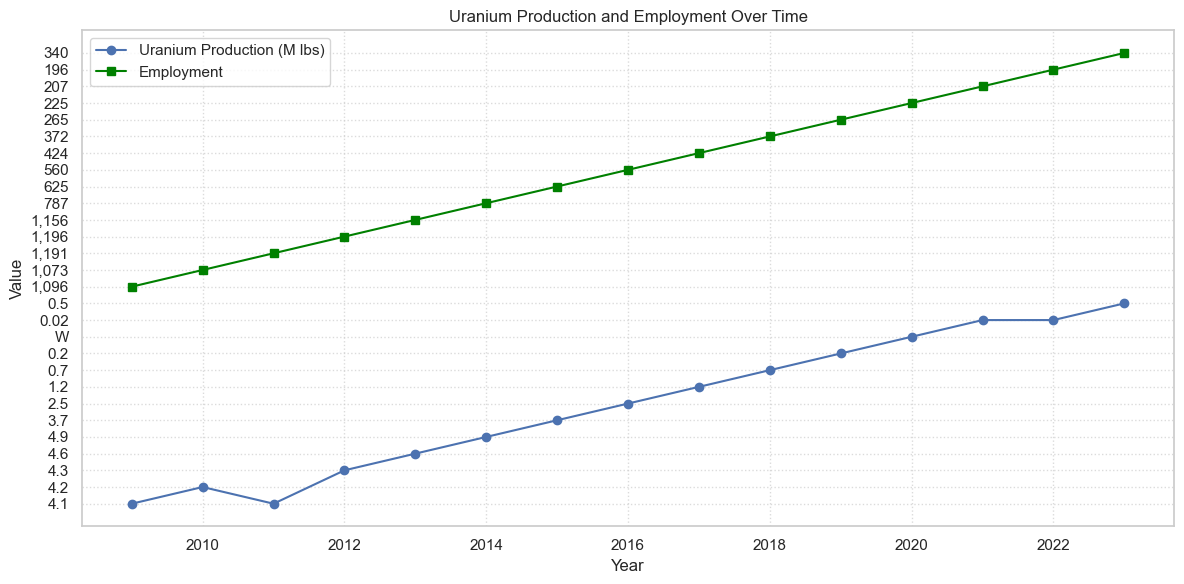

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 1. Line plot: Uranium production and employment over the years
plt.figure(figsize=(12,6))
plt.plot(uranium_prod['Year'], uranium_prod['Mine production of uranium'], label='Uranium Production (M lbs)', marker='o')
plt.plot(uranium_prod['Year'], uranium_prod['Employment'], label='Employment', marker='s', color='green')

plt.title('Uranium Production and Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()




## Death Rates From Energy Production

In [ ]:
death_rates.head(5)

,Entity,Deaths per TWh of electricity production,Year
0,Biomass,4.630,2021
1,Brown coal,32.720,2021
2,Coal,24.620,2021
3,Gas,2.821,2021
4,Hydropower,1.300,2021


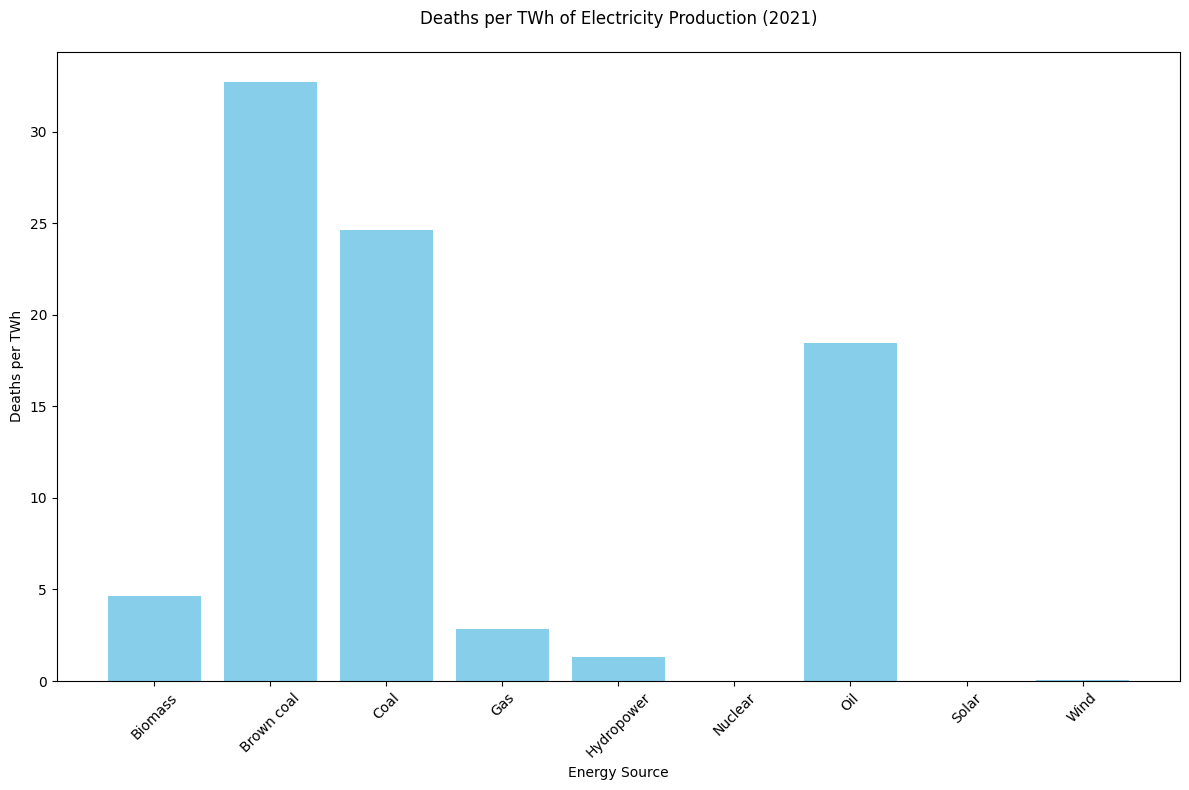

In [ ]:



# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(tabdeath_rates['Entity'], tabdeath_rates['Deaths per TWh of electricity production'], color='skyblue')
plt.title('Deaths per TWh of Electricity Production (2021)', pad=20)
plt.xlabel('Energy Source')
plt.ylabel('Deaths per TWh')

# Display the plot
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

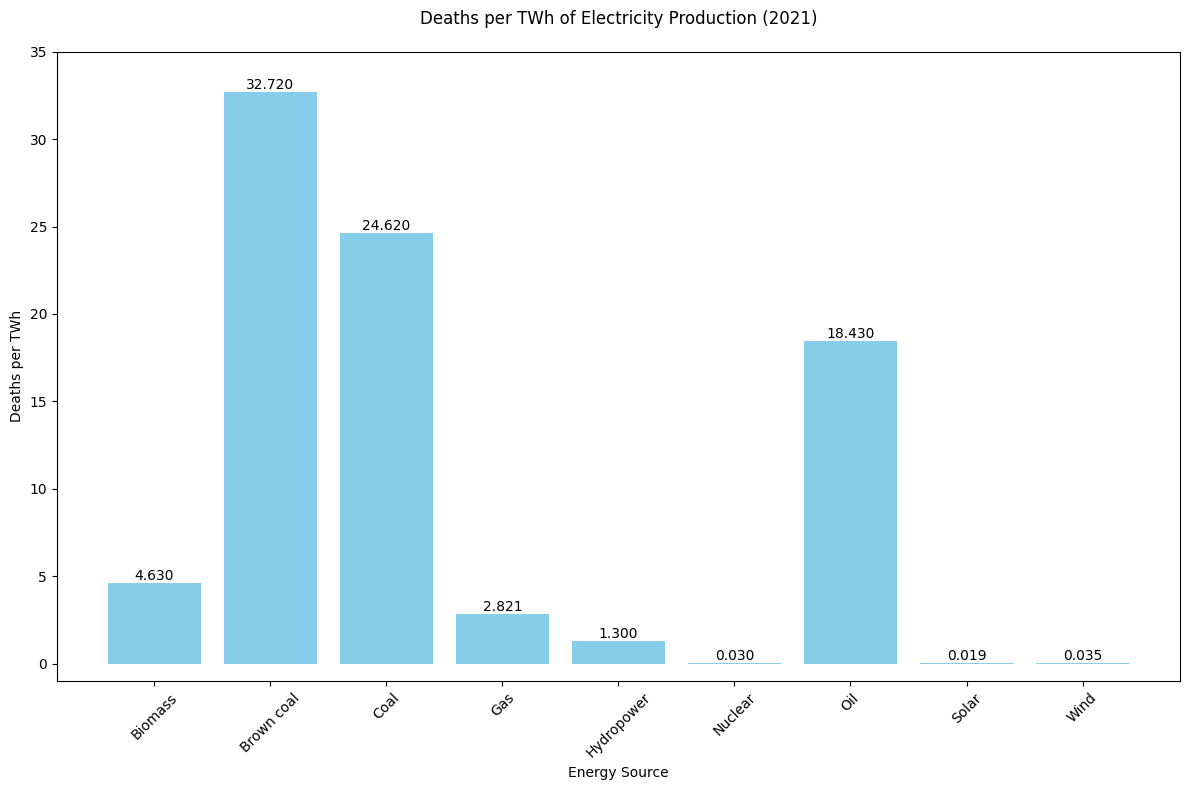

In [35]:

data = {
    'Entity': ['Biomass', 'Brown coal', 'Coal', 'Gas', 'Hydropower', 'Nuclear', 'Oil', 'Solar', 'Wind'],
    'Deaths per TWh of electricity production': [4.630, 32.720, 24.620, 2.821, 1.300, 0.030, 18.430, 0.019, 0.035],
    'Year': [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021]}
tabdeath_rates = pd.DataFrame(data)
plt.figure(figsize=(12, 8))
bars = plt.bar(tabdeath_rates['Entity'], tabdeath_rates['Deaths per TWh of electricity production'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.title('Deaths per TWh of Electricity Production (2021)', pad=20)
plt.xlabel('Energy Source')
plt.ylabel('Deaths per TWh')
plt.ylim(-1, 35)

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## Nuclear Energy Overview 


In [17]:
nuclear_overview

,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1973,January,Not Available,14.533,6246,3.9,57.8
1,1973,February,Not Available,14.533,5928,4.1,60.7
2,1973,March,Not Available,15.314,6649,4.5,58.4
3,1973,April,Not Available,15.314,5876,4.2,53.4
4,1973,May,Not Available,16.174,5697,3.9,47.3
...,...,...,...,...,...,...,...
609,2023,October,93,95.746,61403,18.6,86.2
610,2023,November,93,95.746,62258,19.3,90.3
611,2023,December,93,95.746,68898,19.9,96.7
612,2024,January,93,95.723,69080,18.2,97.1


In [ ]:
# Replace "Not Available" values with NaN
nuclear_overview.replace("Not Available", np.nan, inplace=True)

# Check for missing values
print("\nMissing values per column:")
print(nuclear_overview.isnull().sum())



Missing values per column:
Year                                                0
Month                                               0
Nuclear Generating Units, Total Operable Units    242
Nuclear Generating Units, Net Summer Capacity       0
Nuclear Electricity Net Generation                  0
Nuclear Share of Electricity Net Generation         0
Nuclear Generating Units, Capacity Factor           0
dtype: int64



## Reactors by Parent Company

In [ ]:
reactors_companies.head(5)

,"Plant Name, Unit Number",Parent Company Utility Name,Parent Company Website,Year of Update
0,Callaway Plant,AmerenUE,www.ameren.com,2020
1,"Palo Verde Nuclear Generating Station, Unit 1",Arizona Public Service Company,www.aps.com,2020
2,"Palo Verde Nuclear Generating Station, Unit 2",Arizona Public Service Company,www.aps.com,2020
3,"Palo Verde Nuclear Generating Station, Unit 3",Arizona Public Service Company,www.aps.com,2020
4,"Millstone Power Station, Unit 2",Dominion Generation,www.dom.com,2020


In [19]:

reactors_companies.replace("Not Available", np.nan, inplace=True)
print("\nMissing values per column:")
print(reactors_companies.isnull().sum())



Missing values per column:
Plant Name, Unit Number        0
Parent Company Utility Name    0
Parent Company Website         0
Year of Update                 0
dtype: int64


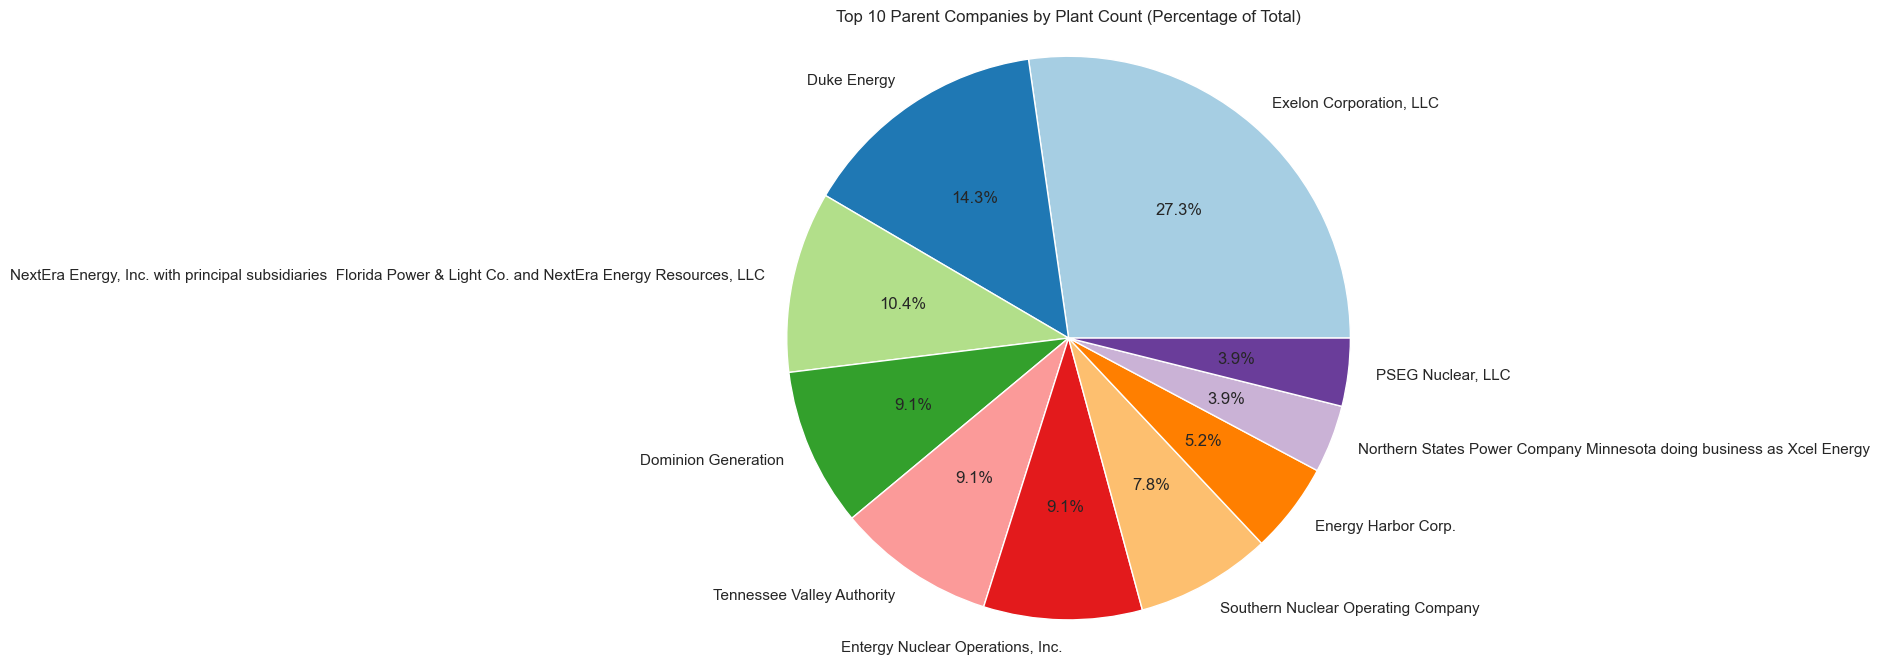

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count the number of occurrences for each 'Parent Company Utility Name'
company_counts = reactors_companies['Parent Company Utility Name'].value_counts()

# Step 2: Select the top 10 companies
top_10_companies = company_counts.head(10)

# Step 3: Calculate the percentage share of the total number of reactors
total_count = company_counts.sum()
percentages = (company_counts.loc[top_10_companies.index] / total_count) * 100

# Step 4: Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 10 Parent Companies by Plant Count (Percentage of Total)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

## Uranium Plants in US


In [ ]:
uranium_plants. head(5)

,Year,Mills - conventional milling,Mills - other operations,In-situ recovery plants,Byproduct recovery plants
0,2000,1,2,3,0
1,2001,0,1,3,0
2,2002,0,1,2,0
3,2003,0,0,2,0
4,2004,0,0,3,0


In [20]:
print("\nMissing values per column:")
print(uranium_plants.isnull().sum())


Missing values per column:
Year                            0
Mills - conventional milling    0
Mills - other operations        0
In-situ recovery plants         0
Byproduct recovery plants       0
dtype: int64


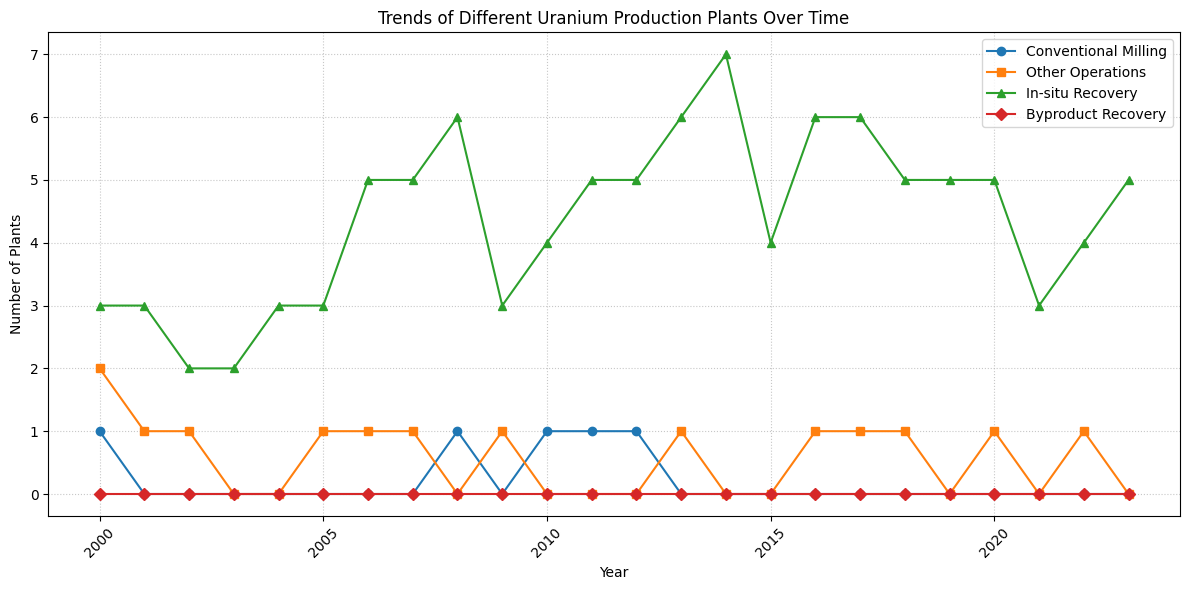

In [22]:

plt.figure(figsize=(12, 6))
plt.plot(uranium_plants['Year'], uranium_plants['Mills - conventional milling'], label='Conventional Milling', marker='o')
plt.plot(uranium_plants['Year'], uranium_plants['Mills - other operations'], label='Other Operations', marker='s')
plt.plot(uranium_plants['Year'], uranium_plants['In-situ recovery plants'], label='In-situ Recovery', marker='^')
plt.plot(uranium_plants['Year'], uranium_plants['Byproduct recovery plants'], label='Byproduct Recovery', marker='D')
plt.title('Trends of Different Uranium Production Plants Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## World Nuclear Generation

In [23]:
world_nuclear_gen.head(5)

,Entity,Year,electricity_from_nuclear_twh,share_of_electricity_pct
0,Afghanistan,2000,0.0,0.0
1,Afghanistan,2001,0.0,0.0
2,Afghanistan,2002,0.0,0.0
3,Afghanistan,2003,0.0,0.0
4,Afghanistan,2004,0.0,0.0


c:\Users\User\.pymod\pymod_envs\pymod_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1400x800 with 0 Axes>

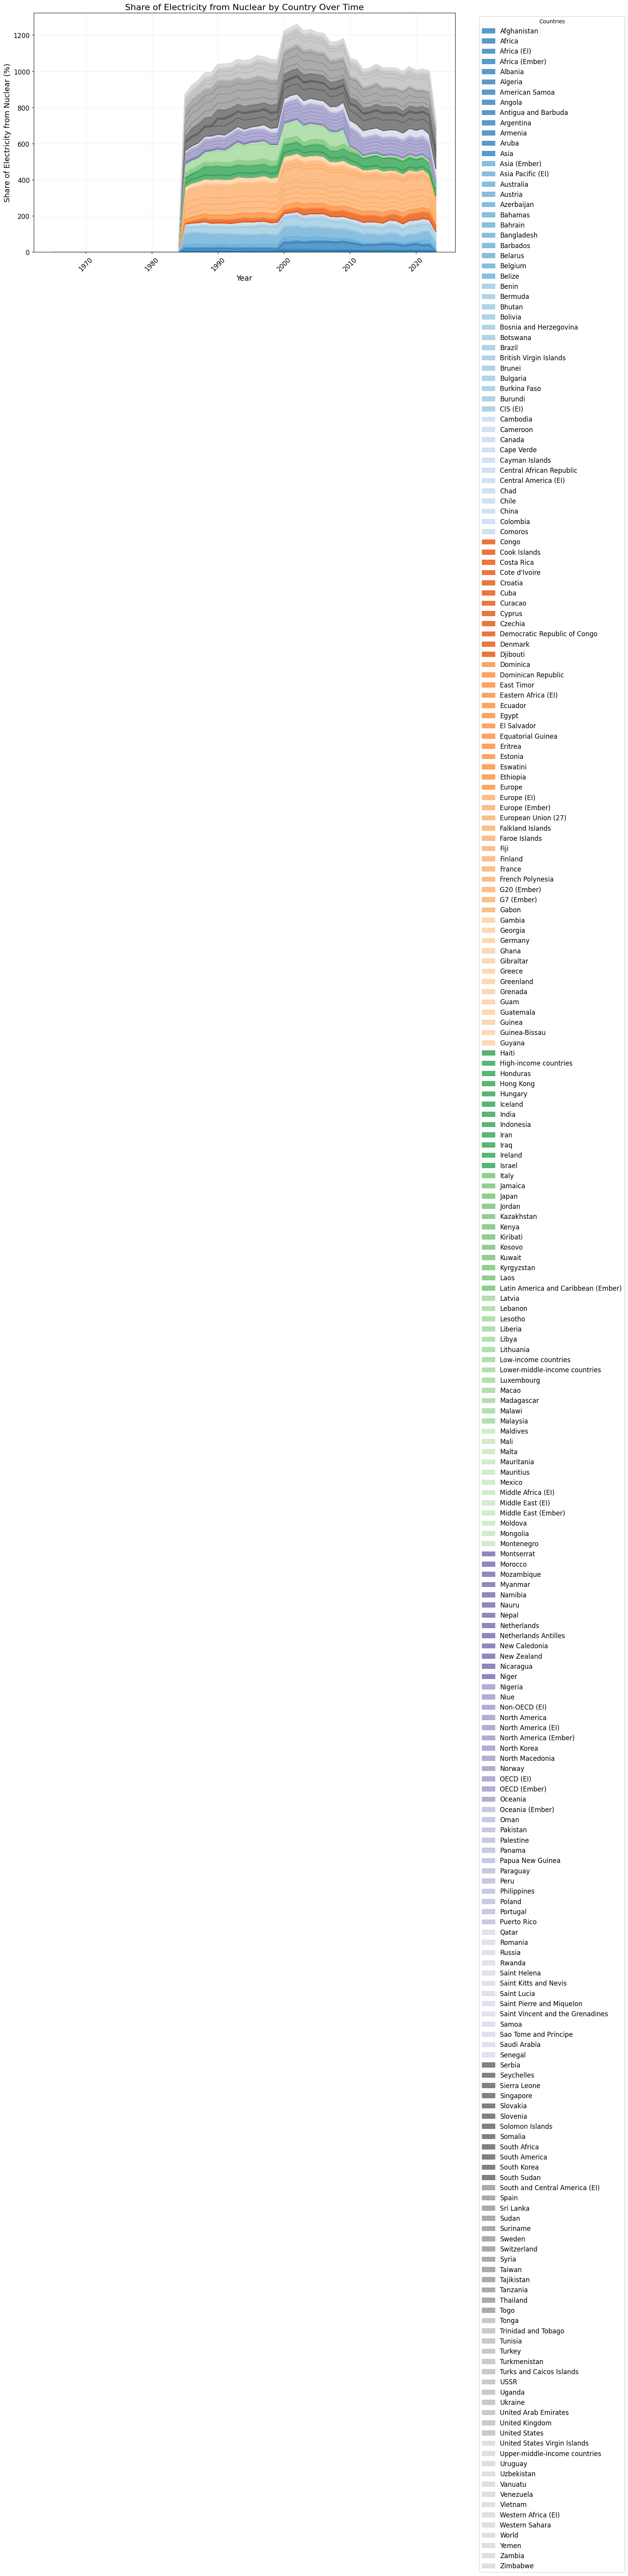

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

nuclear_data_pivot = world_nuclear_gen.pivot(index='Year', columns='Entity', values='share_of_electricity_pct')
plt.figure(figsize=(14, 8))
nuclear_data_pivot.plot(kind='area', stacked=True, figsize=(14, 8), cmap='tab20c', alpha=0.8)
plt.title('Share of Electricity from Nuclear by Country Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Share of Electricity from Nuclear (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

## Uranium Purchase Prices


In [ ]:
uranium_prices.head(5)


,Delivery year,Total purchased,Purchased from U.S. producers,Purchased from U.S. brokers and traders,"Purchased from other owners and operators of U.S. civilian nuclear power reactors, other U.S. suppliers, (and U.S. government for 2007)",Purchased from foreign suppliers,U.S.-origin uranium,Foreign-origin uranium,Spot contracts,"Short-, medium-, and long-term contracts"
0,2002,10.36,13.03,10.21,W,10.37,10.89,10.29,9.29,10.58
1,2003,10.81,14.17,11.05,10.16,10.82,10.81,10.81,10.10,10.94
2,2004,12.61,- -,12.08,11.30,13.15,11.87,12.76,14.77,12.24
3,2005,14.36,W,13.76,W,14.70,15.11,14.21,20.04,13.70
4,2006,18.61,- -,20.49,W,18.62,17.85,18.75,39.48,16.38


In [ ]:

uranium_prices.replace("Not Available", np.nan, inplace=True)

# Check for missing values
print("\nMissing values per column:")
print(uranium_prices.isnull().sum())

# Replacing "W" and "- -" with NaN
uranium_prices.replace(["W", "- -"], np.nan, inplace=True)

# Convert all columns to numeric where possible
uranium_prices = uranium_prices.apply(pd.to_numeric, errors='coerce')

# Check for missing values
print(uranium_prices.isnull().sum())



Missing values per column:
Delivery year                                                                                                                              0
Total purchased                                                                                                                            0
Purchased from U.S. producers                                                                                                              0
Purchased from U.S. brokers and traders                                                                                                    0
Purchased from other owners and operators of U.S. civilian nuclear power reactors, other U.S. suppliers, (and U.S. government for 2007)    0
Purchased from foreign suppliers                                                                                                           0
U.S.-origin uranium                                                                                                           

<Figure size 1400x800 with 0 Axes>

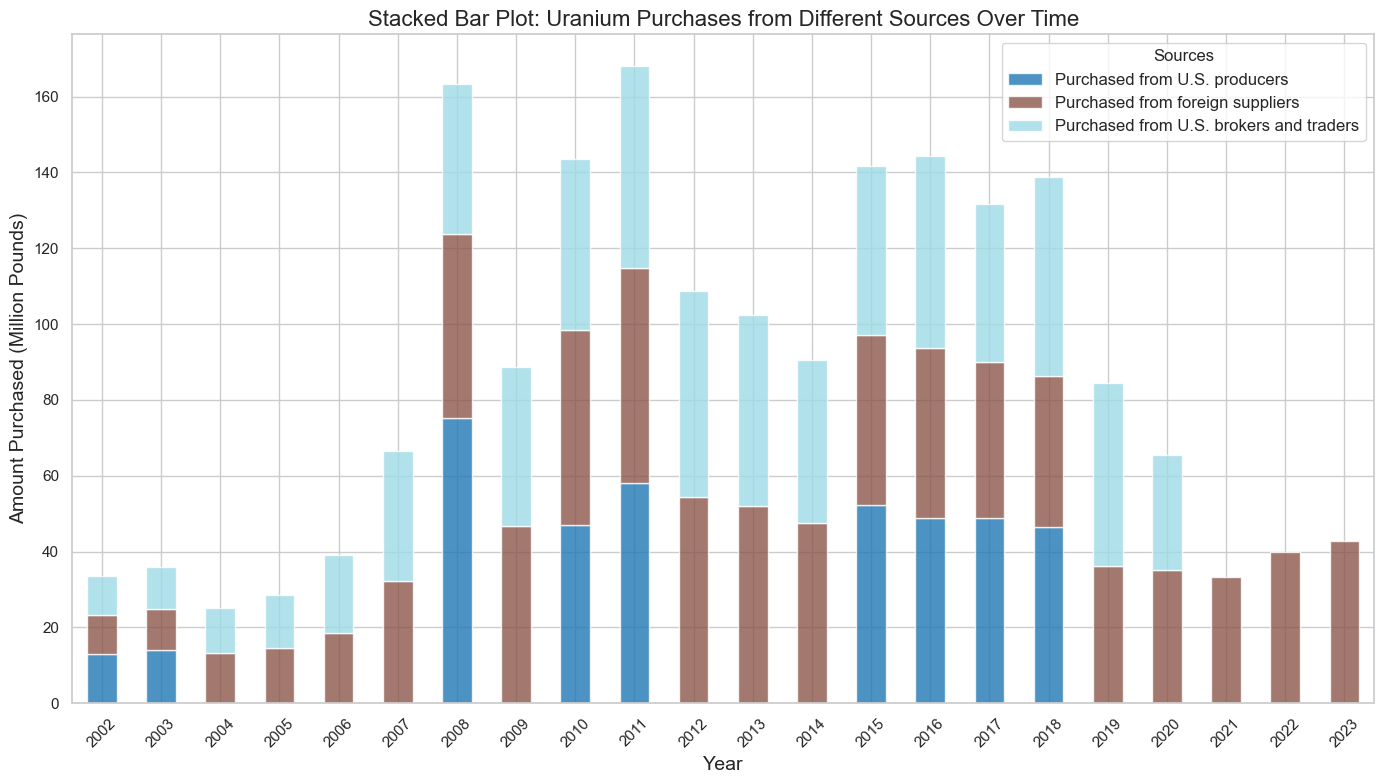

In [ ]:

plt.figure(figsize=(14, 8))
uranium_prices.set_index('Delivery year')[['Purchased from U.S. producers', 'Purchased from foreign suppliers', 'Purchased from U.S. brokers and traders']].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20', alpha=0.8)

plt.title('Stacked Bar Plot: Uranium Purchases from Different Sources Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount Purchased (Million Pounds)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sources', fontsize=12)
plt.tight_layout()
plt.show()

